# Project 2: Model Project
**Name:** Jana Ucnova (pvw581) // Spring Semester 2020

# Ramsey model

Firstly, modules needed are imported. 

In [1]:
import numpy as np
import mpmath as mp
import sympy
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
import ipywidgets as widgets

## Model description
In this project, we will focus on the neoclassic **Ramsey model** of economic growth.

In the Ramsey model, there is **a finite number of homogeneous agents** with **an infinite time horizon**. Therefore, it is considered as a representative agent model. A **closed economy** is considered and time is continuous. At any point in time, there are **three markets** - one for output goods, one for labor, and the rental market for capital goods. 

There are **two types of agents**. On the one hand, there are **firms**. They rent capital and hire labor. They want to maximize their profit. On the other hand, **households** own capital, they supply labor and consume. They decide how much it is optimal to consume and save, so they can maximize their utility.

We have **four variables**:
- Output: $Y_t$
- Capital: $K_t$
- Labor supply: $L_t$
- Consumption: $C_t$

However, we will mostly consider these variables per worker, i.e.
- Output per worker: $y_t = \frac{Y_t}{L_t}$
- Capital per worker: $k_t = \frac{K_t}{L_t}$
- Labor per worker: $l_t = 1$
- Consumption per worker: $c_t = \frac{C_t}{L_t}$

Moreover, prices are taken as given by both firms and households. We have
- Wage rate: $w_t$
- Rental rate of capital: $r_t$

Capital depreciates at rate $\delta>0$ by period. Therefore, the return on household savings, $R_t$, is given by

$$ R_t = 1 + r_t - \delta$$

Firms are owned by households. They rent capital for $r_t$ and hire labor for $w_t$ to produce goods. Then profits are transferred to the households. Firms have access to production technology that is given by **production function**: 

$$
Y_t = F(K_t,L_t) = f(k_t)L_t
$$

The reresentative firm maximizes profit:

$$
\underset{K_t,L_t}{\mathrm{max}} F(K_t,L_t) - r_rK_t - w_tL_t
$$

with first order conditions

$$
F_K(K_t,L_t)= f'(k_t) = r_t \\
$$
$$
F_L(K_t,L_t) = f(k_t) - f'(k_t)k_t = w_t
$$

that define demand functions for capital and labor.

### 2. Households
Households work for a real wage. They use it for either consumption or they save it in the form of
accumulating assets, on which they later get interest income. Households try to maximize their current happiness and happiness of all their future descendants, i.e. **overall utility**. They maximize the discounted sum of utility from consumption:

$$
\underset{\{c_t\}_{t=0}^{\infty}}{\mathrm{max}} \sum_{t=0}^{\infty} \beta^tu(c_t)
$$

where $u'(c_t)>0$, $u''(c_t)<0$ and $\beta \in (0,1)$ is a preference factor. Moreover constrains are given by

$$
k_{t+1} = R_tk_t + w_t - c_t \\
$$
$$
\underset{t \to \infty}{\mathrm{lim}}\frac{k_t}{\mathcal{R}_t } \geq 0 \\
$$
$$
\mathcal{R}_t = \prod_{j=0}^{t}R_j
$$
with $k_0$, and paths for $\{R_t\}_{t=0}^{\infty}$ and $\{w_t\}_{t=0}^{\infty}$ given. 

Optimal behavior of household is implied by Euler equation:

$$
\frac{u'(c_t)}{u'(c_{t+1})} = \beta R_{t+1}
$$

We consider CRRA utility function
$$
u(c_t) = \frac{c_t^{1- \gamma}}{1- \gamma}
$$
where $\gamma>0$, and Cobb-Douglas production function defined as
$$
F(K_t,L_t) = AK_t^{\alpha}L_t^{1-\alpha}
$$
where $\alpha \in (0,1)$ and $A>0$.
This implies that
$$
f(k_t) = Ak_t^{\alpha}
$$
and therefore
$$
r_t = A \alpha k_t^{\alpha-1} \\
$$
$$
w_t = A(1-\alpha)k_t^{\alpha}
$$

## Steady state
### Analytical solution

To find an analytical solution of **steady-state**, we use **sympy**. Firstly, we find an analytical expression for the Euler equation with respect to $c_{t+1}$.

Then, we need to define all symbols.

In [2]:
gamma = sm.symbols('gamma')
delta = sm.symbols('delta')
c1 = sm.symbols('c_t')
c2 = sm.symbols('c_{t+1}')
k1 = sm.symbols('k_t')
R = sm.symbols('R_{t+1}')
beta = sm.symbols('beta')
A = sm.symbols('A')
alpha = sm.symbols('alpha')
kss = sm.symbols('k_{ss}')
css = sm.symbols('c_{ss}')
u = sm.symbols('u')
r = A*alpha*k1**(alpha-1)
w = A*(1-alpha)*k1**alpha
R = 1 + r - delta

Utility function is given by

In [3]:
utilityfun1 = c1**(1-gamma)/(1-gamma)
utilityfun2 = c2**(1-gamma)/(1-gamma)
display(utilityfun1,utilityfun2)

c_t**(1 - gamma)/(1 - gamma)

c_{t+1}**(1 - gamma)/(1 - gamma)

Euler equation is then given by

In [4]:
eulereq = sm.Eq(sm.diff(utilityfun1,c1)/sm.diff(utilityfun2,c2),beta*R)
eulereq

Eq(c_t**(1 - gamma)*c_{t+1}*c_{t+1}**(gamma - 1)/c_t, beta*(A*alpha*k_t**(alpha - 1) - delta + 1))

We solve Euler equation with respect to $c_{t+1}$ and obain:

In [5]:
eulereq_sol = sm.solve(eulereq,c2)[0]
sm.Eq(c2,eulereq_sol)

Eq(c_{t+1}, (beta*c_t**gamma*(A*alpha*k_t**alpha - delta*k_t + k_t)/k_t)**(1/gamma))

In steady state, it holds that the level of capital and consumption is constant, i.e. $k_{t+1}=k_t$ and $c_{t+1}=c_t$.
From the Euler equation, steady-state of capital can be expressed as


In [6]:
steady_state_c = sm.Eq(eulereq_sol,c1)
steady_state_c
steady_state_c_sol = sm.solve(steady_state_c,k1)
sm.Eq(kss,steady_state_c_sol[0])

Eq(k_{ss}, ((beta*(delta - 1) + 1)/(A*alpha*beta))**(1/(alpha - 1)))

From budget constraint $k_{t+1} = R_tk_t + w_t - c_t $, steady-state of consumption is expressed as

In [7]:
steady_state_k = sm.Eq(k1,(R*k1+w-c1))
steady_state_k
steady_state_k_sol = sm.solve(steady_state_k,c1)
sm.Eq(css,steady_state_k_sol[0])

Eq(c_{ss}, A*k_t**alpha - delta*k_t)

These two equations define steady-state level of capital and consumption in Ramsey model.

### Numerical solution

Firstly, we choose parameters:

In [8]:
beta = 0.96
delta = 0.10
alpha = 1/3
gamma = 0.3
A = 2

We want to find steady-state levels of consumption, $c_{ss}$, and capital, $k_{ss}$.

To do that, we need to define functions from the setup.

In [9]:
# Utility function
def u(c):
    """
    Inputs:
        1) c: current period's level of consumption per worker
    
    Returns:
        1) Value of current period's utility

    """
    if gamma != 1:
        return (c**(1 - gamma) - 1) / (1 - gamma)
    else:
        return np.log(c) # When gamma = 1, we obtain log function

# Lifetime utility function for an agent who lives for only two periods
# Beta is preference factor, 0 < beta < 1
def U(c1, c2):
    """
    Inputs:
        1) C1: consumption per worker in period 1
        2) C2: consumption per worker in period 2
        
    Returns:
        1) Value of utility for lifetime consumption
         
    """
    return u(c1) + beta * u(c2)

# Intensive production function f(k)
# Where A > 0 and 0 < alpha < 1
def f(k):
    """
    Inputs:
        1) k_t: current period's level of capital per worker
        
    Returns:
        1) y_t: current period's output per worker
        
    """

    return A*k**alpha

# Rental rate of capital r_t
def r(k):
    """
    Inputs:
        1) k_t: current period's level of capital per worker
        
    Returns:
        1) r_t: current period's level of rental rate of capital
        
    """

    return A*alpha*k**(alpha-1)

# Wage rate w_t
def w(k):
    """
    Inputs:
        1) k_t: current period's level of capital per worker
        
    Returns:
        1) w_t: current period's level of wage rate
        
    """
    
    return A*(1-alpha)*k**alpha

# Return on household savings R_t
def R(k):
    """
    Inputs:
        1) k_t: current period's level of capital per worker
        
    Returns:
        1) R_t: current period's level of return on household savings
        
    """

    return 1+r(k)-delta


We define another two functions. The first on is a **budget constraint**, i.e. $k_{t+1} = R_tk_t + w_t - c_t $, that gives us the level of next period's capital per worker. The second one is the Euler equation with respect to $c_{t+1}$, i.e. $c_{t+1}=c_t(\beta R_{t+1})^{1/\gamma}$.

In [10]:
# Next period's capital stock per worker
def capital(k,c):
    """
    Inputs:
        1) k_t: current period's level of capital per worker
        2) c_t: current period's level of consumption per worker
        
    Returns:
        1) k_t+1: next period's capital stock per worker
        
    """
    return (R(k))*k + w(k) - c


# Euler equation that gives next period's consumption per worker
def euler(k,c):
    """
    Inputs:
        1) k_t: next period's level of capital per effective worker
        2) c_t: current period's level of consumption per effective worker
        
    Returns:
        1) c_t+1: next period's consumption per effective worker
        
    """
    return (beta*R(k))**(1/gamma)*c

We define functions that give us the difference in capital and consumption between any two periods. In steady-state, it hold that $k_{t+1}=k_t$ and $c_{t+1}=c_t$.

In [11]:
# The change in capital stock per worker between any two periods is
# k_t+1 - k_t = capital(k, c) - k
# In steady state, capital stock per worker is constant, i.e. k_t=k_t+1
# Thus, steady state values of k and c must solve 
# capital(k,c) - k = 0

def F1(k,c):
    
    return capital(k,c) - k


# The change in consumption between any two periods is
# c_t+1 - c_t = euler(k, c) - c
# In steady state, also consumption is constant, i.e. c_t+1=c_t
# Thus, steady state values of k and c must solve 
# euler(k,c) - c = 0

def F2(k,c):
    
    return euler(k,c) - c

# Get steady state
def ramseySteadyState(X):
    out = [F1(X[0], X[1])]
    out.append(F2(X[0], X[1]))
    return out

Now, we want to find steady-state values of capital and consumption. Equations *capital* and *euler* form a two-equation dynamical system with two unknowns. It must, therefore, hold that

F1(k_ss, c_ss) = 0

F2(k_ss, c_ss) = 0

That is a root-finding problem. We fill use the function *fsolve()* to find these roots.

In [12]:
# Our guess
k0, c0 = 1, 1

# Use solver to define steady state
k_SS, c_SS = optimize.fsolve(func=ramseySteadyState, x0=(k0, c0))
r_ss = r(k_SS)
w_ss = w(k_SS)

# Print results
print('Steady state for given parameters is defined by:')
print(f"k_ss = {k_SS:.4f}")
print(f"c_ss = {c_SS:.4f}")
print(f"r_ss = {r_ss:.4f}")
print(f"w_ss = {w_ss:.4f}")

Steady state for given parameters is defined by:
k_ss = 10.2085
c_ss = 3.3178
r_ss = 0.1417
w_ss = 2.8924


Now, we would like to visualize a steady-state by the phase diagram. We define functions for a steady-state.

In [13]:
# The steady-state level of capital stock per effective worker
def k_ss(): 
   
    return ((beta*delta-beta+1)/(A*alpha*beta))**(1/(alpha-1))

# The steady-state level of consumption per effective worker
def c_ss(): 
   
    return A*k_ss()**alpha-delta*k_ss()

# Define a function that takes k as an input and return the value of c consistent with F1(k, c) = 0
def locusK(k):
    """
    Inputs:
        1) k: capital stock per effective worker
        
    Returns:
        1) c: consumption per effective worker 
        
    """
    return f(k)  - delta * k

And we construct the diagram.

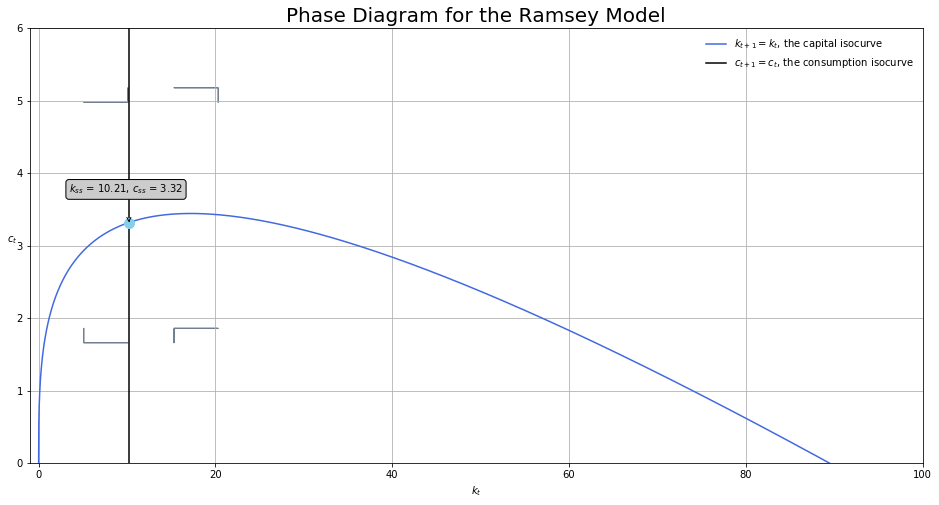

In [14]:
# Create a grid of points for plotting
gridmax, gridsize = 200, 10000
grid = np.linspace(0, gridmax, gridsize)

# Create a new figure
plt.figure(figsize=(16,8))

# Add the c and k 
plt.plot(grid, locusK(grid), '-', color='royalblue', label=r'$k_{t+1}=k_t$, the capital isocurve')
plt.axvline(k_ss(), color='black', label=r'$c_{t+1}=c_t$, the consumption isocurve')
plt.plot(k_ss(), c_ss(), marker='.', markersize=20, color='skyblue')

# Create annotation for steady state
ss = '$k_{ss}$ = '+ str(round(k_ss(),2)) + ', ' + '$c_{ss}$ = '+ str(round(c_ss(),2))
plt.annotate(ss,
            xy=(k_ss(), c_ss()),
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=20, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

# Add arrows to indicate out of steady-state dynamics
x_len = 0.025 * gridmax 
y_len = 1 / x_len   

plt.arrow(x=0.5 * k_ss(), y=0.5 * c_ss(), dx=0, dy=y_len, color='slategray')
plt.arrow(x=0.5 * k_ss(), y=0.5 * c_ss(), dx=x_len, dy=0, color='slategray')

plt.arrow(x=0.5 * k_ss() + x_len, y=1.5 * c_ss(), dx=0, dy=y_len, color='slategray')
plt.arrow(x=0.5 * k_ss() + x_len, y=1.5 * c_ss(), dx=-x_len, dy=0, color='slategray')

plt.arrow(x=1.5 * k_ss(), y=0.5 * c_ss() + y_len, dx=0, dy=-y_len, color='slategray')
plt.arrow(x=1.5 * k_ss(), y=0.5 * c_ss() + y_len, dx=x_len, dy=0, color='slategray')

plt.arrow(x=1.5 * k_ss() + x_len, y=1.5 * c_ss() + y_len, dx=0, dy=-y_len, color='slategray')
plt.arrow(x=1.5 * k_ss() + x_len, y=1.5 * c_ss() + y_len, dx=-x_len, dy=0, color='slategray')

# Label axis
plt.xlabel('$k_t$')
plt.ylabel('$c_t$', rotation='horizontal')

# Add a title to the plot
plt.title('Phase Diagram for the Ramsey Model', size=20)

# Add the legend
plt.legend(frameon=False)
plt.grid(True)

# Change range of axis
plt.ylim((0, 6)) 
plt.xlim((-1, 100)) 


plt.savefig('Ramsey-Phase-Diagram.png')

## Pernament change in preference parameter $\beta$

Preference parameter $\beta$ controls consumption preferences. The change in this parameter will affect the Euler equation. We assume that the economy is now in the steady-state that can be represented by the phase diagram above and we want to see what happens when the parameter $\beta$ changes.


To see how the economy responds to the change in parameter $\beta$, we construct an interactive plot with the slider.

We define functions of steady-state once again, however this time with input *beta*.

In [15]:
def k_star(beta): 
    
    return ((beta*delta-beta+1)/(A*alpha*beta))**(1/(alpha-1))
    
def c_star(beta): 
    
    return A*k_star(beta)**alpha-delta*k_star(beta)

def locusK_beta(k):
    """
    Inputs:
        1) k: capital stock per effective worker
        
    Returns:
        1) c: consumption per effective worker 
        
    """
    return f(k)  - delta * k

We define function *beta_shock*:

In [16]:
def beta_shock(betas):
    
    # Create a grid of points for plotting
    gridmax, gridsize = 200, 10000
    grid = np.linspace(0, gridmax, gridsize)

    # Create a new figure
    plt.figure(figsize=(16,8))

    # Add the c and k 
    plt.plot(grid, locusK_beta(grid), '-', color='royalblue', label=r'$k_{t+1}=k_t$, the capital isocurve')
    plt.axvline(k_star(betas), color='black', label=r'$c_{t+1}=c_t$, the consumption isocurve')
    plt.plot(k_star(betas), c_star(betas), marker='.', markersize=20, color='skyblue')

    # Create annotation for steady state
    ss_beta = '$k_{ss}$ = '+ str(round(k_star(betas),2)) + ', ' + '$c_{ss}$ = '+ str(round(c_star(betas),2))
    plt.annotate(ss_beta,
            xy=(k_star(betas), c_star(betas)),  # theta, radius
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=20, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

    # Label axis
    plt.xlabel('$k_t$')
    plt.ylabel('$c_t$', rotation='horizontal')

    # Add a title to the plot
    plt.title('Phase Diagram for the Ramsey Model, pernament shock in preference parameter', size=20)

    # Add the legend
    plt.legend(frameon=False)
    plt.grid(True)

    # Change range of axis
    plt.ylim((0, 6)) 
    plt.xlim((-1, 100)) 

And we can construct an interactive phase diagram with *beta slider*. This plot shows the response of the economy to an unforeseen shock to the preference parameter $\beta$.

In [17]:
widgets.interact(beta_shock,
    betas=widgets.FloatSlider(description='beta', min=0.01, max=0.99, step=0.01, value=0.96),
);

interactive(children=(FloatSlider(value=0.96, description='beta', max=0.99, min=0.01, step=0.01), Output()), _…

It can be seen that a decrease in $\beta$ results in a decrease in both steady-state capital, $k_{ss}$, and consumption, $c_{ss}$.

## Government
Now, we introduce government in the economy. Government expenditure, $G_t>0$, does not affect households' preferences for consumption and firms' current and future productivity. That means that government expenditure does not affect the consumption
isocurve, it only shifts the capital isocurve downwards, i.e. it is now defined as

$$
c_t = Ak_t^{\alpha}-\delta k_t - G_t
$$

We define functions of steady-state once again, however, this time we include government expenditure, $G$.

In [18]:
def k_govern(): 
    
    return ((beta*delta-beta+1)/(A*alpha*beta))**(1/(alpha-1))
    
def c_govern(G): 
    
    return A*k_star(beta)**alpha-delta*k_star(beta)-G

def locusK_G(k,G):
    """
    Inputs:
        1) k: capital stock per effective worker
        
    Returns:
        1) c: consumption per effective worker 
        
    """
    return f(k)  - delta * k - G

We define function *government_exp*:

In [19]:
def government_exp(G):
    
    # Create a grid of points for plotting
    gridmax, gridsize = 200, 10000
    grid = np.linspace(0, gridmax, gridsize)

    # Create a new figure
    plt.figure(figsize=(16,8))

    # Add the c and k
    plt.plot(grid, locusK_G(grid,G), '-', color='royalblue', label=r'$k_{t+1}=k_t$, the capital isocurve')
    plt.axvline(k_govern(), color='black', label=r'$c_{t+1}=c_t$, the consumption isocurve')
    plt.plot(k_govern(), c_govern(G), marker='.', markersize=20, color='skyblue')

    # Create annotation for steady state
    ss_g = '$k_{ss}$ = '+ str(round(k_govern(),2)) + ', ' + '$c_{ss}$ = '+ str(round(c_govern(G),2))
    plt.annotate(ss_g,
            xy=(k_govern(), c_govern(G)),  # theta, radius
            xytext=(-60, 30), textcoords='offset points',
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->",
                            shrinkA=20, shrinkB=10,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))

    # Label axis
    plt.xlabel('$k_t$')
    plt.ylabel('$c_t$', rotation='horizontal')

    # Add a title to the plot
    plt.title('Phase Diagram for the Ramsey Model, government expenditures', size=20)

    # Add the legend
    plt.legend(frameon=False)
    plt.grid(True)

    # Change range of axis
    plt.ylim((0, 6)) 
    plt.xlim((-1, 100)) 

And we can construct an interactive phase diagram with *G slider*. This plot shows the response of the economy to a permanent change in government expenditures.

In [20]:
widgets.interact(government_exp,
    G=widgets.FloatSlider(description='G', min=0, max=3, step=0.2, value=0),
);

interactive(children=(FloatSlider(value=0.0, description='G', max=3.0, step=0.2), Output()), _dom_classes=('wi…

It can be seen that a permanent increase in government expenditures shifts the blue curve that illustrates the level of consumption downwards.

## Conclusion

In this project, we focused on the Ramsey model. We found both analytical and numerical solutions for a steady-state that are given by

In [21]:
print('Analytical solution for steady state:')
display(sm.Eq(kss,steady_state_c_sol[0]),sm.Eq(css,steady_state_k_sol[0]))
print('Numerical solution for steady state for given parameters:')
print(f"k_ss = {k_SS:.4f}")
print(f"c_ss = {c_SS:.4f}")

Analytical solution for steady state:


Eq(k_{ss}, ((beta*(delta - 1) + 1)/(A*alpha*beta))**(1/(alpha - 1)))

Eq(c_{ss}, A*k_t**alpha - delta*k_t)

Numerical solution for steady state for given parameters:
k_ss = 10.2085
c_ss = 3.3178


Then we visualized this solution by the phase diagram. For our further analysis, we decided to focus on a permanent change in preference parameter $\beta$ and the introduction of government. Using an interactive phase diagram, one can see that decrease in preference parameter $\beta$ results in the shift of the consumption isocurve to the left which implies a decrease in steady-state capital and consumption. After that, we introduced government expenditure, $G_t>0$. Government expenditure does not affect households' preferences for consumption and firms' current and future productivity. Using an interactive phase diagram once again, it can be seen that an increase in government expenditure, $G_t$, results in the shift of the capital isocurve downwards. This implies that a steady-state level of capital remains the same as before, but a steady-state level of consumption decreases.